In [ ]:
# IMport libraries
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt




In [ ]:
# Data Set

from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:06<00:00, 4050619.20it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 312127.02it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4867314.07it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5155749.04it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_ind = train_data.class_to_idx
class_to_ind

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
print(f"Image shpae {image.shape} ")
print(f"image label  ; {class_names[label]}")

Image shpae torch.Size([1, 28, 28]) 
image label  ; Ankle boot


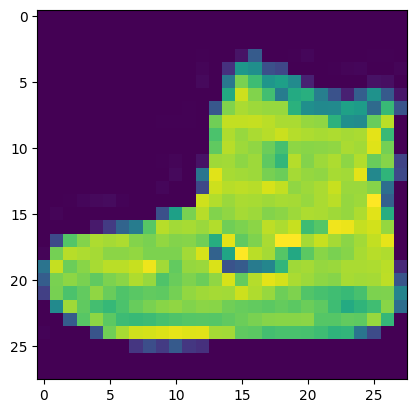

In [ ]:
# visualization

plt.imshow(image.squeeze())

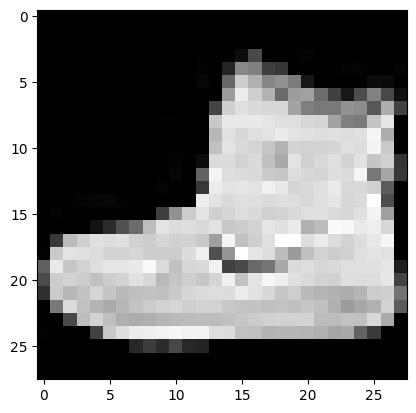

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')

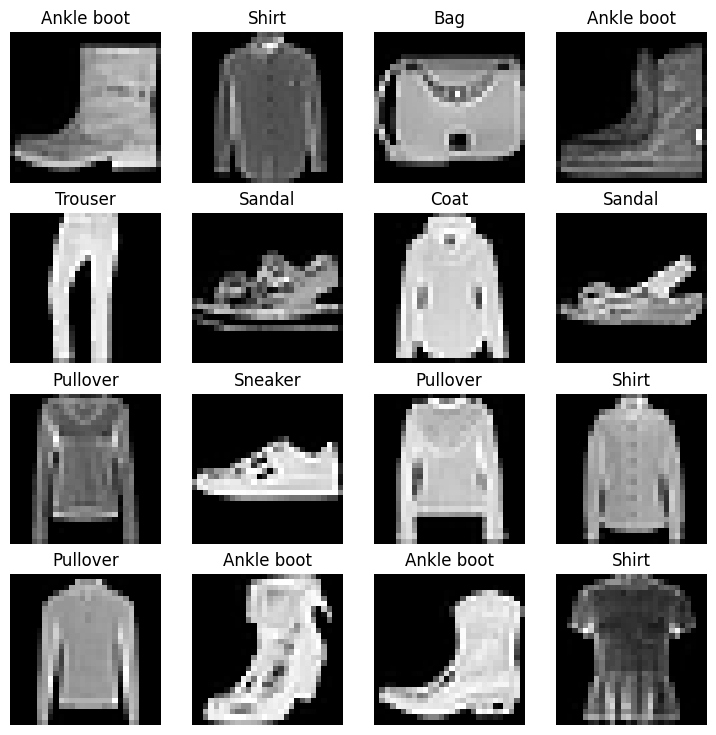

In [ ]:
torch.manual_seed(42)

fig = plt.figure(figsize = (9,9))
rows , cols = 4, 4
for i in range(1 , rows*cols+1) :
  random_idx = torch.randint(0,len(train_data) , size = [1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows , cols , i )
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)


In [ ]:
# Data into batches

from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data , batch_size = 32 , shuffle = True)
test_dataloader = DataLoader(test_data , batch_size = 32 , shuffle = False)



In [ ]:
train_dataloader


In [ ]:
len(train_dataloader)  , len(test_dataloader)

(1875, 313)

In [ ]:
train_feature_batch, train_labels_batch = next(iter(  train_dataloader ))
train_feature_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

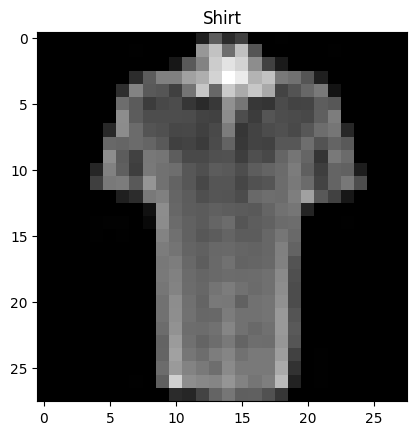

In [ ]:
# sample

torch.manual_seed(42)
random_ind = torch.randint(0, len(train_feature_batch) , size= [1]).item()
img , label = train_feature_batch[random_ind] , train_labels_batch[random_ind]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])

In [ ]:
# model_0

flatten_model = nn.Flatten()
x = train_feature_batch[0]

output = flatten_model(x)

output.shape

torch.Size([1, 784])

In [ ]:
from torch import nn

class FashionModel0(nn.Module) :
  def __init__(self , input_shape , hidden_units , output_shape ) :
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features= hidden_units  ),
        nn.Linear(in_features = hidden_units , out_features = output_shape)
    )
  def forward(self , x ) :
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0 = FashionModel0(
    input_shape = 28*28 ,
    hidden_units= 10 ,
    output_shape = len(class_names)
)

model_0

FashionModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])

model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
# loss & optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.1)


In [ ]:
def accuracy_fn(y_true , y_pred) :
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
from timeit import default_timer as timer
def print_train_time(start , end , device)  :
  total = end - start
  print(f"Train time on {device} : {total:.3f} seconds")
  return total


In [ ]:
from tqdm.auto import tqdm



In [ ]:
# Training Loop

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 4

for epoch in tqdm(range(epochs))  :
  print(f"Epoch {epoch} : ")

  train_loss = 0
  for batch , (X,y) in enumerate(train_dataloader) :
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred , y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0 :
      print(f" {batch * len(X)} / {len(train_dataloader.dataset)}  Samples")

  train_loss /= len(train_dataloader)


  test_loss , test_acc = 0 , 0

  model_0.eval()

  with torch.inference_mode() :
    for X_test , y_test in test_dataloader :
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred , y_test)

      test_acc += accuracy_fn(y_test , test_pred.argmax(dim =1 ))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"Train loss : {train_loss }  | test_loss : {test_loss}  | test_acc : {test_acc} ")



train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu  ,
                                            end = train_time_end_on_cpu   ,
                                            device = str(next(model_0.parameters()).device ) )




  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 0 : 
 0 / 60000  Samples
 12800 / 60000  Samples
 25600 / 60000  Samples
 38400 / 60000  Samples
 51200 / 60000  Samples
Train loss : 0.5903892517089844  | test_loss : 0.5095350742340088  | test_acc : 82.03873801916933 
Epoch 1 : 
 0 / 60000  Samples
 12800 / 60000  Samples
 25600 / 60000  Samples
 38400 / 60000  Samples
 51200 / 60000  Samples
Train loss : 0.4763319790363312  | test_loss : 0.47988998889923096  | test_acc : 83.19688498402556 
Epoch 2 : 
 0 / 60000  Samples
 12800 / 60000  Samples
 25600 / 60000  Samples
 38400 / 60000  Samples
 51200 / 60000  Samples
Train loss : 0.4550333023071289  | test_loss : 0.47663894295692444  | test_acc : 83.42651757188499 
Epoch 3 : 
 0 / 60000  Samples
 12800 / 60000  Samples
 25600 / 60000  Samples
 38400 / 60000  Samples
 51200 / 60000  Samples
Train loss : 0.4425109028816223  | test_loss : 0.4630562663078308  | test_acc : 83.74600638977635 
Train time on cpu : 64.070 seconds


In [ ]:
# preds

torch.manual_seed(42)

def eval_model(model , data_loader , loss_fn , accuracy_fn , device) :
  loss , acc  = 0 ,0
  model.eval()
  with torch.inference_mode() :
    for X , y in tqdm(data_loader) :

      X , y = X.to(device) , y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred , y )

      acc += accuracy_fn(y , y_pred.argmax(dim = 1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model" : model.__class__.__name__  ,
          "model_loss" : loss.item(),
          "model_acc " : acc
          }



In [ ]:
# evaluate the model
model_0_res = eval_model(model_0 , test_dataloader , loss_fn , accuracy_fn, device = 'cpu')

model_0_res


  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'FashionModel0',
 'model_loss': 0.4630562663078308,
 'model_acc ': 83.74600638977635}

In [ ]:
# device agnostic

!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available()  else 'cpu'
device

'cpu'

## Non Linear Model

In [ ]:
class FashionModel1(nn.Module) :
  def __init__(self , input_shape , hidden_units , output_shape) :
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten() ,
        nn.Linear(in_features = input_shape  , out_features= hidden_units),
        nn.ReLU() ,
        nn.Linear(in_features = hidden_units , out_features= output_shape),
        nn.ReLU()
    )
  def forward(self ,x ) :
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)
model_1 = FashionModel1(input_shape= 784,
                        hidden_units= 10 ,
                        output_shape= len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
## loss & optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_1.parameters() , lr = 0.1)


In [ ]:
# Training ans testing loop

def train_step(model , data_loader , loss_fn , optimizer ,  acc_fn , device ) :
  train_loss , train_acc =0 ,0

  model.to(device)

  model.train()

  for batch , (X ,y ) in enumerate(data_loader) :

    X, y  = X.to(device) ,  y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred , y )
    train_loss += loss
    train_acc += acc_fn(y , y_pred.argmax(dim = 1 ))

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss : {train_loss : .5f} | Train acc : {train_acc : .2f}%")



In [ ]:
def test_step(model,  data_loader , loss_fn , acc_fn , device ) :
  test_loss , test_acc = 0 , 0

  model.to(device)

  model.eval()

  with torch.inference_mode() :
    for X, y in data_loader :
      X , y = X.to(device) , y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred , y )

      test_acc += acc_fn(y , test_pred.argmax(dim =1 ))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss : {test_loss : .5f} |  Test_acc : {test_acc : .2f}%")


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 4

for epoch in tqdm(range(epochs)) :
  print(f"Epoch : {epoch}")

  train_step(model_1 , train_dataloader , loss_fn , optimizer,
             accuracy_fn , device )

  test_step(model_1 , test_dataloader , loss_fn , accuracy_fn , device)


train_time_end_on_gpu = timer()

total_time_model_1 = print_train_time(train_time_start_on_gpu ,
                                      train_time_end_on_gpu, device )




  0%|          | 0/4 [00:00<?, ?it/s]

Epoch : 0
Train loss :  1.09199 | Train acc :  61.34%
Test loss :  0.95636 |  Test_acc :  65.00%
Epoch : 1
Train loss :  0.78101 | Train acc :  71.93%
Test loss :  0.72227 |  Test_acc :  73.91%
Epoch : 2
Train loss :  0.67027 | Train acc :  75.94%
Test loss :  0.68500 |  Test_acc :  75.02%
Epoch : 3
Train loss :  0.64384 | Train acc :  76.52%
Test loss :  0.65079 |  Test_acc :  76.13%
Train time on cpu : 56.540 seconds


In [ ]:
model_0_res

{'model': 'FashionModel0',
 'model_loss': 0.4630562663078308,
 'model_acc ': 83.74600638977635}

In [ ]:
total_train_time_model_0

64.06964551499999

In [ ]:
## model1 results

model_1_res = eval_model(model_1 , test_dataloader ,
                         loss_fn , accuracy_fn  , device )

model_1_res

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'FashionModel1',
 'model_loss': 0.6507947444915771,
 'model_acc ': 76.12819488817891}

**Convolution Neural Nets**

In [ ]:
class FashionModel2(nn.Module) :
  def __init__(self, input_shape , hidden_units , output_shape) :
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape ,
                  out_channels = hidden_units,
                  kernel_size= 3 ,
                  stride = 1 ,
                  padding = 1 ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3 ,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2 )
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride = 1 ,
                  padding = 1 ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size= 3 ,
                  stride = 1,
                  padding = 1 ) ,
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features= output_shape)
    )

  def forward(self , x ) :
    x =  self.conv_block_1(x)
    #print(f"output shape conv1 : {x.shape}")
    x = self.conv_block_2(x)
    #print(f"output shape of conv 2 {x.shape}")
    x = self.classifier(x)
    return x



In [ ]:
torch.manual_seed(42)

model_2 = FashionModel2(input_shape= 1 ,
                        hidden_units=10,
                        output_shape =  len(class_names)).to(device)

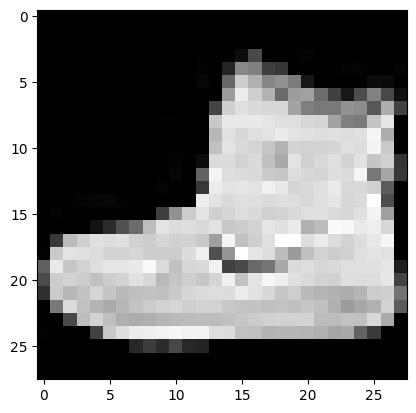

In [ ]:
plt.imshow(image.squeeze(), cmap = "gray")

In [ ]:
rand_img_tensor = torch.randn(size = (1,28,28))
rand_img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_img_tensor.unsqueeze(0).to(device ))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
torch.manual_seed(42)

images  = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"batch shape :  {images.shape} ")
print(f"Single image shape : {test_image.shape}")
print(f"test image : {test_image}")


batch shape :  torch.Size([32, 3, 64, 64]) 
Single image shape : torch.Size([3, 64, 64])
test image : tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [ ]:
## Understanding the Conv layer

conv_layer = nn.Conv2d(in_channels= 3 ,
                       out_channels = 10 ,
                       kernel_size= (3,3) ,
                       stride = 1 ,
                       padding = 1 )

conv_output = conv_layer(test_image.unsqueeze(dim = 0 ))

conv_output.shape

torch.Size([1, 10, 64, 64])

In [ ]:
## Understanding maxpooling

max_pool_layer = nn.MaxPool2d(kernel_size= 2)
test_image_via_conv = conv_layer(test_image.unsqueeze(dim = 0 ))
print(f"Shape after going via conv layer : {test_image_via_conv.shape}")

test_image_via_conv_and_maxPool = max_pool_layer(test_image_via_conv)
print(f"shape after going via conv layer() and max pool() : {test_image_via_conv_and_maxPool.shape}")



Shape after going via conv layer : torch.Size([1, 10, 64, 64])
shape after going via conv layer() and max pool() : torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size = (1,1,2,2))
print(f"Random tensor : {random_tensor} | shape : {random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size= 2)
max_pool_tensor = max_pool_layer(random_tensor)

print(f"Max pool tensor  ;{ max_pool_tensor} | shape : {max_pool_tensor.shape}")


Random tensor : tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) | shape : torch.Size([1, 1, 2, 2])
Max pool tensor  ;tensor([[[[0.3367]]]]) | shape : torch.Size([1, 1, 1, 1])


**loss and optimizer**

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_2.parameters() , lr = 0.1)


In [ ]:
# train and testing model_2

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()


epochs = 3

for epoch in tqdm(range(epochs)) :
  print(f"epochs : {epoch }")

  train_step(model = model_2 ,
             data_loader = train_dataloader ,
             loss_fn= loss_fn ,
             optimizer = optimizer ,
             acc_fn = accuracy_fn,
             device = device )

  test_step(model = model_2 ,
            data_loader=  test_dataloader ,
            loss_fn = loss_fn ,
            acc_fn = accuracy_fn ,
            device = device )

  train_time_end_model_2 = timer()

  total_time_model_2 = print_train_time(train_time_start_model_2,
                                        train_time_end_model_2,
                                        device = device )
  print(total_time_model_2)


  0%|          | 0/3 [00:00<?, ?it/s]

epochs : 0
Train loss :  0.59518 | Train acc :  78.38%
Test loss :  0.39500 |  Test_acc :  85.99%
Train time on cpu : 61.256 seconds
61.25589590699997
epochs : 1
Train loss :  0.36536 | Train acc :  86.90%
Test loss :  0.35244 |  Test_acc :  86.91%
Train time on cpu : 119.483 seconds
119.48261002499999
epochs : 2
Train loss :  0.32588 | Train acc :  88.13%
Test loss :  0.32719 |  Test_acc :  88.07%
Train time on cpu : 178.279 seconds
178.27885562799997


In [ ]:
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader ,
                             loss_fn = loss_fn ,
                             accuracy_fn = accuracy_fn ,
                             device = device )

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_2_results

{'model': 'FashionModel2',
 'model_loss': 0.32718968391418457,
 'model_acc ': 88.06908945686901}

In [ ]:
model_0_res

{'model': 'FashionModel0',
 'model_loss': 0.4630562663078308,
 'model_acc ': 83.74600638977635}

In [ ]:
model_1_res

{'model': 'FashionModel1',
 'model_loss': 0.6507947444915771,
 'model_acc ': 76.12819488817891}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_res,
                                model_1_res,
                                model_2_results])

compare_results

,model,model_loss,model_acc
0,FashionModel0,0.463056,83.746006
1,FashionModel1,0.650795,76.128195
2,FashionModel2,0.327190,88.069089


In [ ]:
 # adding training time t oresults

compare_results["training_time"] = [total_train_time_model_0 ,
                                     total_time_model_1,
                                     total_time_model_2]

compare_results

,model,model_loss,model_acc,training_time
0,FashionModel0,0.463056,83.746006,64.069646
1,FashionModel1,0.650795,76.128195,56.539583
2,FashionModel2,0.327190,88.069089,178.278856


Text(0, 0.5, 'model')

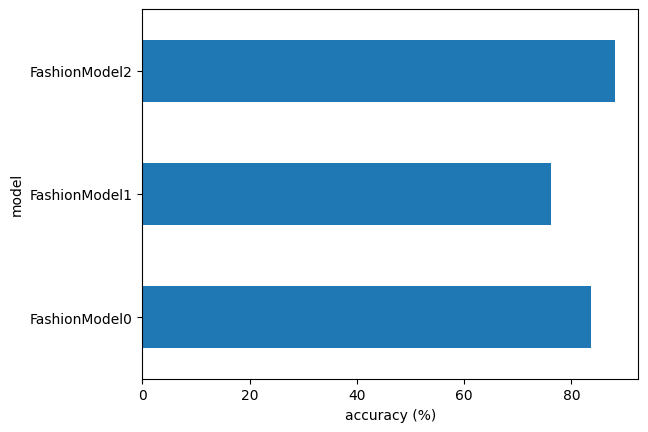

In [ ]:
# visualize

compare_results.set_index("model")["model_acc "].plot(kind = "barh")

plt.xlabel("accuracy (%)")
plt.ylabel("model")


In [ ]:
## Predictions

def make_predictions(model, data , device ) :
  pred_probs = []
  model.eval()

  with torch.inference_mode() :
    for sample in data :
      sample = torch.unsqueeze(sample , dim = 0).to(device)

      pred_logit = model(sample )

      pred_prob = torch.softmax(pred_logit.squeeze() , dim =0 )

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)



In [ ]:
img , label = test_data[0]
img.shape , label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample , label in random.sample(list(test_data) , k = 9 )  :
  test_samples.append(sample)
  test_labels.append(label)


(<matplotlib.image.AxesImage at 0x7db6a91f1390>, 'Ankle boot')

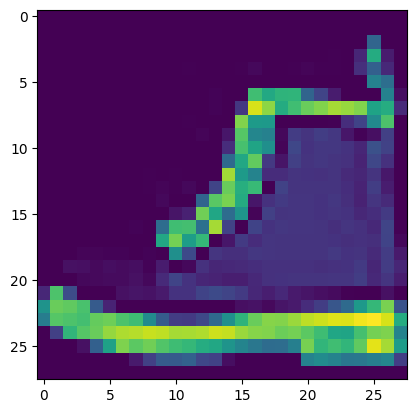

In [ ]:
plt.imshow(test_samples[0].squeeze(0) ) , class_names[test_labels[0]]

In [ ]:
pred_probs = make_predictions(model = model_2 ,
                              data = test_samples ,
                              device = device )
pred_probs.shape

torch.Size([9, 10])

In [ ]:
pred_classes = pred_probs.argmax(dim =1   )
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

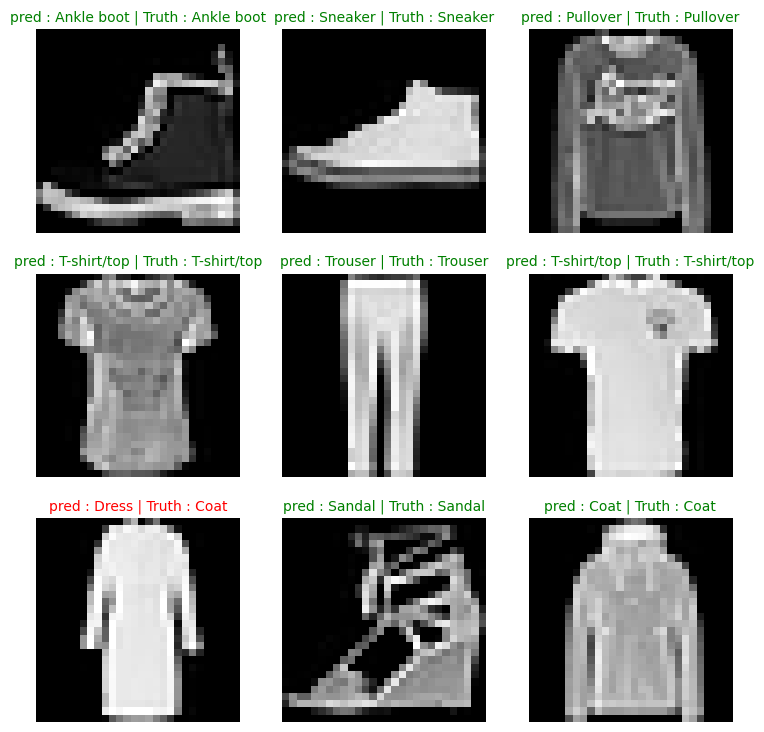

In [ ]:
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i , sample in enumerate(test_samples) :
  plt.subplot(nrows , ncols , i+1)

  plt.imshow(sample.squeeze() , cmap = "gray")

  pred_label = class_names[pred_classes[i]]

  plt.axis(False)

  truth_label = class_names[test_labels[i]]

  title_text = f"pred : {pred_label} | Truth : {truth_label}"

  if pred_label == truth_label :
    plt.title(title_text , fontsize = 10 , color = "green")
  else :
    plt.title(title_text , fontsize = 10 , color = "red")

